In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

### Definition of the model

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, gamma,beta1,beta2,t_tresh=22):
    S,I,R = y

    if t<=t_tresh:
        B=beta1
    elif t>t_tresh:
        B=beta1*np.exp(-(t-t_tresh)/beta2)
    #elif t>1000:
    #    B=0.2*np.exp(-(t-1000)/beta2)
    
    dSdt = -(B*I/N)*S 
    dIdt = (B*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

### Integration of the differential equations

In [3]:
def time_evo(N,beta1,beta2,gamma,death_rate,t_tresh=22,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,gamma,beta1,beta2,t_tresh))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,(1-death_rate/100)*R,R*death_rate/100)

### Show the result

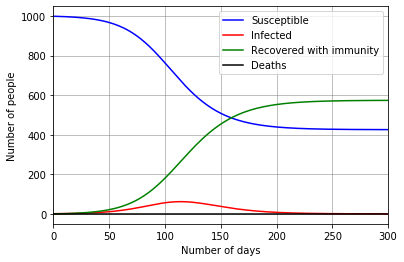

In [4]:
fin_result=time_evo(1000,0.15,10000,0.1,0)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered with immunity')
plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend()
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,300)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

#print(s_vec+i_vec+r_vec+m_vec)

### Load italian data

In [5]:
#nomiregioni=['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania',
   # 'Emilia Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria',
   #    'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna',
   #    'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta",
   #    'Veneto']

nomiregioni=['Abruzzo', 'Basilicata', 'Calabria', 'Campania',
       'Emilia Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria',
       'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna',
       'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta",
       'Veneto']

len(nomiregioni)

20

In [6]:
def esponenziale(t,t0,a):
    return a**(t-t0)

def lineare(t,q,m):
    return m+q*t

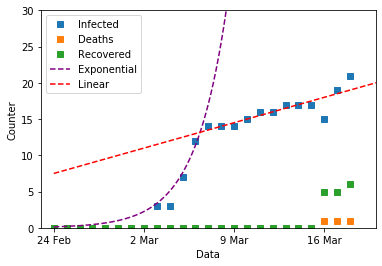

In [12]:
datatot = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')
mask = datatot['denominazione_regione']=='Molise'
data =datatot.loc[mask,:]
xdata=pd.to_numeric(range(data.shape[0]))
ydata=data['totale_casi']
ydata_death=data['deceduti']
ydata_rec=data['dimessi_guariti']

yinfected=ydata-ydata_death-ydata_rec

xgrid=np.arange(0,40,0.1)

plt.plot(xdata,yinfected,linestyle='None',label='Infected',marker='s')
plt.plot(xdata,ydata_death,linestyle='None',label='Deaths',marker='s')
plt.plot(xdata,ydata_rec,linestyle='None',label='Recovered',marker='s')
plt.plot(xgrid,esponenziale(xgrid,5,1.5),label='Exponential',color='purple',linestyle='--')
plt.plot(xgrid,lineare(xgrid,0.5,7.5),label='Linear',color='red',linestyle='--')
#plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Counter')
plt.xticks(np.arange(0,50,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar'])
plt.ylim(0,30)
plt.xlim(-1,25)
plt.legend()
plt.savefig('Data only_MOLISE.png',dpi=300)
plt.show()

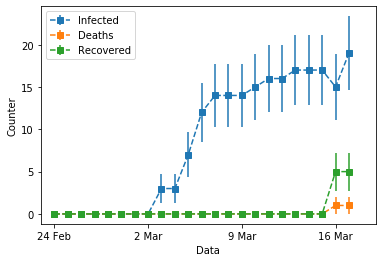

In [9]:
datatot = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')
mask = datatot['denominazione_regione']=='Molise'
data =datatot.loc[mask,:]
xdata=pd.to_numeric(range(data.shape[0]))
ydata=data['totale_casi']
ydata_death=data['deceduti']
ydata_rec=data['dimessi_guariti']

yinfected=ydata-ydata_death-ydata_rec

plt.errorbar(xdata,yinfected,np.sqrt(yinfected),linestyle='--',label='Infected',marker='s')
plt.errorbar(xdata,ydata_death,np.sqrt(ydata_death),linestyle='--',label='Deaths',marker='s')
plt.errorbar(xdata,ydata_rec,np.sqrt(ydata_rec),linestyle='--',label='Recovered',marker='s')
#plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Counter')
plt.xticks(np.arange(0,50,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar'])
plt.xlim(-1,24)
plt.legend()
plt.savefig('Data only_MOLISE.png',dpi=300)
plt.show()

In [11]:
data.iloc[-1]

data                           2020-03-18 17:00:00
stato                                          ITA
codice_regione                                  14
denominazione_regione                       Molise
lat                                        41.5577
long                                       14.6592
ricoverati_con_sintomi                           7
terapia_intensiva                                6
totale_ospedalizzati                            13
isolamento_domiciliare                           8
totale_attualmente_positivi                     21
nuovi_attualmente_positivi                       2
dimessi_guariti                                  6
deceduti                                         1
totale_casi                                     28
tamponi                                        361
Name: 494, dtype: object

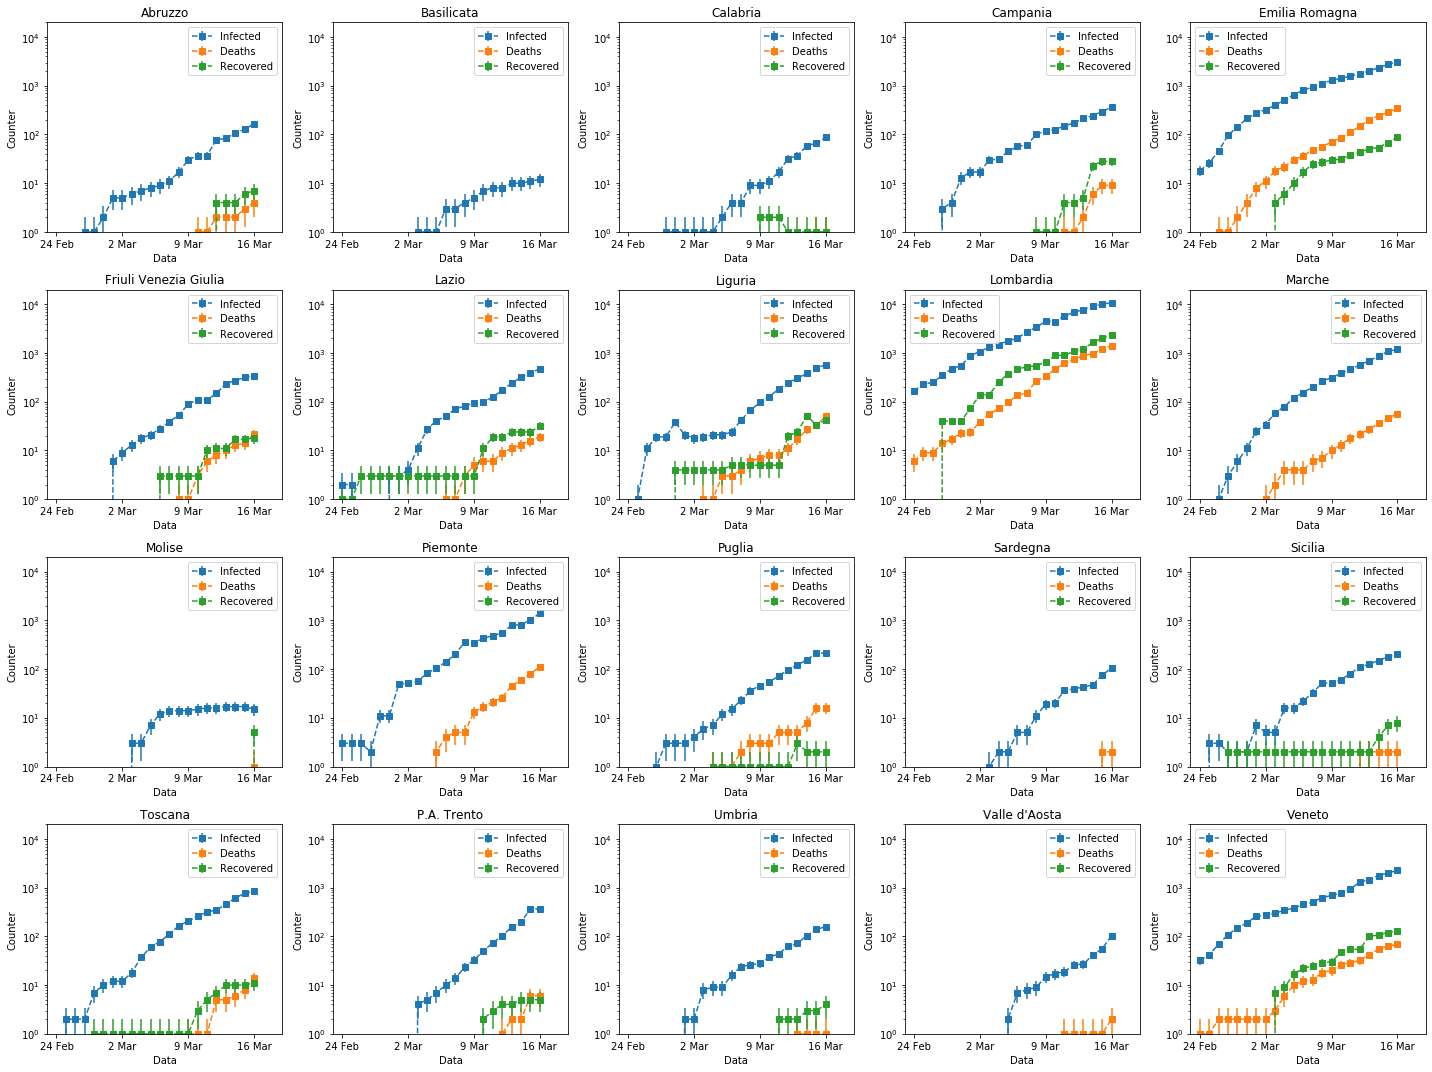

In [96]:
plt.figure(figsize=(20,15))
for i_nome in range(len(nomiregioni)):
    datatot = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')
    mask = datatot['denominazione_regione']==nomiregioni[i_nome]
    data =datatot.loc[mask,:]
    xdata=pd.to_numeric(range(data.shape[0]))
    ydata=data['totale_casi']
    ydata_death=data['deceduti']
    ydata_rec=data['dimessi_guariti']

    yinfected=ydata-ydata_death-ydata_rec
    
    plt.subplot(4,5,i_nome+1)
    plt.errorbar(xdata,yinfected,np.sqrt(yinfected),linestyle='--',label='Infected',marker='s')
    plt.errorbar(xdata,ydata_death,np.sqrt(ydata_death),linestyle='--',label='Deaths',marker='s')
    plt.errorbar(xdata,ydata_rec,np.sqrt(ydata_rec),linestyle='--',label='Recovered',marker='s')
    #plt.yscale('log')
    plt.xlabel('Data')
    plt.ylabel('Counter')
    plt.xticks(np.arange(0,50,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar'])
    plt.xlim(-1,24)
    plt.ylim(1,2*10**4)
    plt.yscale('log')
    plt.legend()
    plt.title(nomiregioni[i_nome])
    plt.subplots_adjust(hspace=0.5)
    plt.tight_layout()
    plt.savefig('Data only_regioni.png',dpi=300)
plt.show()

### comparison between model and data

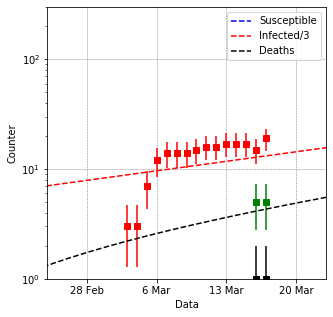

In [157]:
fin_result=time_evo(3*10**5,0.1,100,1/14,6.5,t_tresh=1000,I0=13,t=np.arange(0,720))
#fin_result=time_evo(3*10**5,0.15,100,1/14,6.5,t_tresh=1000,I0=3,t=np.arange(0,720))
#fin_result=time_evo(60*10**6,0.41,28,0.0666666,4.88888,t_tresh=17,I0=2,t=np.arange(0,720))

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

ydata_inf=ydata-ydata_rec-ydata_death

plt.figure(figsize=(5,5))
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(17,45)
plt.ylim(1,3*10**2)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('sirdatacomp_v3.png',dpi=300)
plt.show()

/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


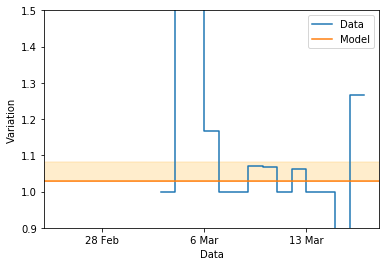

In [158]:
# percentage variation of the contaminted people, compared to the previous day


# data increment
incremento=[]

ydata=np.array(ydata)
ydata_inf=np.array(ydata_inf)

for i in range(1,len(ydata)):
    incremento.append(ydata_inf[i]/ydata_inf[i-1])
 

# sir increment
incr_SIR=[]

for i in range(len(i_vec)-1):
    incr_SIR.append(i_vec[i+1]/i_vec[i])


# general increment (function)

def incr_SIR_fun(N,beta0,beta1,gamma,death_rate,t_tresh=15,I0=0.0065,t=np.arange(0,720)):
    fin_result=time_evo(N,beta0,beta1,gamma,death_rate,t_tresh,I0,t=np.arange(0,720))
    t=fin_result[0]
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]
    
    incr_SIR=[]
    
    for i in range(len(i_vec)-1):
        incr_SIR.append(i_vec[i+1]/i_vec[i])
        
    return np.array(incr_SIR)

# upper and lower limits

beta1h=25
beta1l=15

incr_SIR_high=incr_SIR_fun(3*10**5,0.15,100,1/14,6.5,t_tresh=1000,I0=3)
incr_SIR_low=incr_SIR_fun(3*10**5,0.1,100,1/14,6.5,t_tresh=1000,I0=13)

    
plt.step(xdata[xdata>=1]+17,incremento,label='Data')
plt.step(t[1:],incr_SIR,label='Model')
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,43,1/14,5))
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,13,1/14,5))
plt.fill_between(t[1:],incr_SIR_high,incr_SIR_low,color='orange',alpha=0.2)
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(17,40)
plt.ylim(0.9,1.5)
plt.legend()
plt.savefig('first_derivative_SIR_band_v3.png',dpi=300)
plt.show()

In [159]:
# upper curve

fin_result_high=time_evo(3*10**5,0.15,100,1/14,6.5,t_tresh=1000,I0=3,t=np.arange(0,720))

t_high=fin_result_high[0]
s_vec_high=fin_result_high[1]
i_vec_high=fin_result_high[2]
r_vec_high=fin_result_high[3]
m_vec_high=fin_result_high[4]


# lower curve

fin_result_low=time_evo(3*10**5,0.1,100,1/14,6.5,t_tresh=1000,I0=13,t=np.arange(0,720))

t_low=fin_result_low[0]
s_vec_low=fin_result_low[1]
i_vec_low=fin_result_low[2]
r_vec_low=fin_result_low[3]
m_vec_low=fin_result_low[4]

## predictions (best fit)

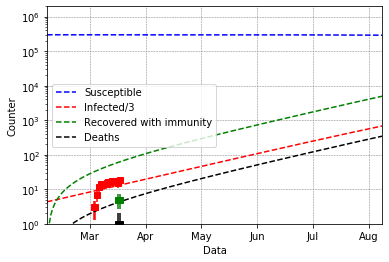

In [160]:
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlim(0,180)
plt.ylim(1,0.2*10**7)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('sirdatacomp_prediction_v3.png',dpi=300)
plt.show()

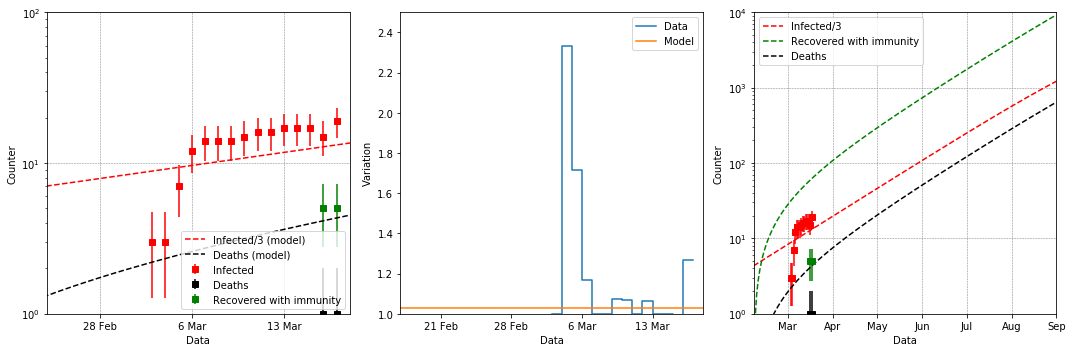

In [161]:
### combined plot

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s',label='Infected')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s',label='Deaths')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s',label='Recovered with immunity')
plt.plot(t, s_vec, 'b--')
plt.plot(t, i_vec/3, 'r--',label='Infected/3 (model)')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--',label='Deaths (model)')
plt.yscale('log')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(17,40)
plt.ylim(1,10**2)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.subplot(1,3,2)
plt.step(xdata[xdata>=1]+17,incremento,label='Data')
plt.step(t[1:],incr_SIR,label='Model')
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(10,40)
plt.ylim(1,2.5)
plt.legend()
plt.subplot(1,3,3)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
#plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xlim(0,180)
plt.ylim(1,10**4)
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('combined_SIR_v3.png',dpi=300)
plt.show()

In [162]:
print('Total deaths ',int(m_vec[-1]))
print('Total infected ',int(m_vec[-1]+r_vec[-1]))
print('Maximum infected ',int(i_vec.max()/3))
print('Maximum infected (hospitalized)',int(i_vec.max()/3*20/100))
print('Maximum infected (intensive care)',int(i_vec.max()/3*10/100))

Total deaths  9965
Total infected  153312
Maximum infected  4540
Maximum infected (hospitalized) 908
Maximum infected (intensive care) 454


In [163]:
modello_check=i_vec[17:17+len(ydata)]/3
data_check=ydata_inf

accuracy=round(np.mean(np.abs((data_check-modello_check))/data_check)*100,2)

print('The accuracy of the model on past data is ',accuracy,'%')

The accuracy of the model on past data is  inf %


/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [89]:
print(np.array((data_check-modello_check)/data_check*100))

[        -inf         -inf         -inf         -inf         -inf
         -inf         -inf         -inf -60.29215497 -90.77097358
   3.85334507  34.79185213  35.71651379  26.82433141  17.51495611
  14.02555141  10.78363045   2.07742771  -0.34721461  -8.42764623
 -16.31073373 -40.42880392 -17.33240891]


/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [164]:
modello_death_check=m_vec[17:17+len(ydata)]
data_death_check=ydata_death

accuracy_death=round(np.mean(np.abs((data_death_check-modello_death_check))/data_death_check)*100,2)

print('accuracy on deaths',accuracy_death,'%')

accuracy on deaths inf %


In [165]:
#export
export = pd.DataFrame({'t':t, 's':s_vec, 'i': i_vec, 'r': r_vec, 'm':m_vec})
export.to_csv('export.csv',index=False)

In [166]:
def minimizer_1var(beta1):
    
    fin_result=time_evo(60*10**6,0.415,beta1,1/14,6,t_tresh=17,I0=2,t=np.arange(0,720))

    t=fin_result[0]
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]

    #compute the error on infected 
    modello_check=i_vec[17:17+len(ydata)]/3
    data_check=ydata_inf
    
    accuracy=round(np.mean(np.abs((data_check-modello_check))/data_check)*100,2)
    
    #compute the error on deaths
    modello_death_check=m_vec[17:17+len(ydata)]
    data_death_check=ydata_death
    accuracy_death=round(np.mean(np.abs((data_death_check-modello_death_check))/data_death_check)*100,2)

    return accuracy

minimizer_1var_vec=np.vectorize(minimizer_1var)

/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


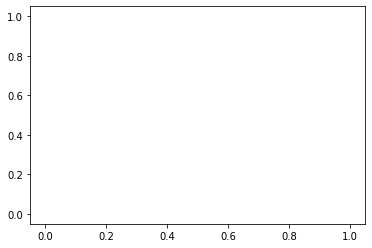

In [167]:
beta1grid=np.arange(25,30,0.1)
beta1y=minimizer_1var_vec(beta1grid)

plt.plot(beta1grid,beta1y)
plt.show()

## automatic minimization

In [168]:
def minimizer(x):
    
    beta0,beta1,gamma,death_rate=x
    
    fin_result=time_evo(60*10**6,beta0,beta1,gamma,death_rate,t_tresh=17,I0=2,t=np.arange(0,720))

    t=fin_result[0]
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]

    #compute the error on infected 
    modello_check=i_vec[17:17+len(ydata)]/3
    data_check=(ydata-ydata_rec)
    accuracy=round(np.mean(np.abs((data_check-modello_check))/data_check)*100,2)
    
    #compute the error on deaths
    modello_death_check=m_vec[17:17+len(ydata)]
    data_death_check=ydata_death
    accuracy_death=round(np.mean(np.abs((data_death_check-modello_death_check))/data_death_check)*100,2)

    return (accuracy+accuracy_death)/2


minimizer_vec=np.vectorize(minimizer)

In [169]:
minimizer([0.415,28.5,1/14,4.8])

inf

In [170]:
initial_guess=[0.415,27,1/14,5]

from scipy.optimize import minimize

res=minimize(minimizer,initial_guess)

res.x

/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]


array([ 0.415     , 27.        ,  0.07142857,  5.        ])

In [171]:
# brute force (not efficient)

b0_grid=np.linspace(0.41,0.42,10)
b1_grid=np.linspace(27,28,10)
gamma_grid=np.linspace(0.06,0.09,10)
death_rate_grid=np.linspace(4,6,10)

minimo_tab=[]

#for i in b0_grid:
#    print(i)
#    for j in b1_grid:
#        for k in gamma_grid:
#            for l in death_rate_grid:
#                minimo_tab.append([i,j,k,l,minimizer([i,j,k,l])])

In [63]:
#minimo_tab_arr=np.array(minimo_tab)

#position=minimo_tab_arr[:,4].argmin()
#minimo_tab_arr[position]

## predictions with uncertaintites

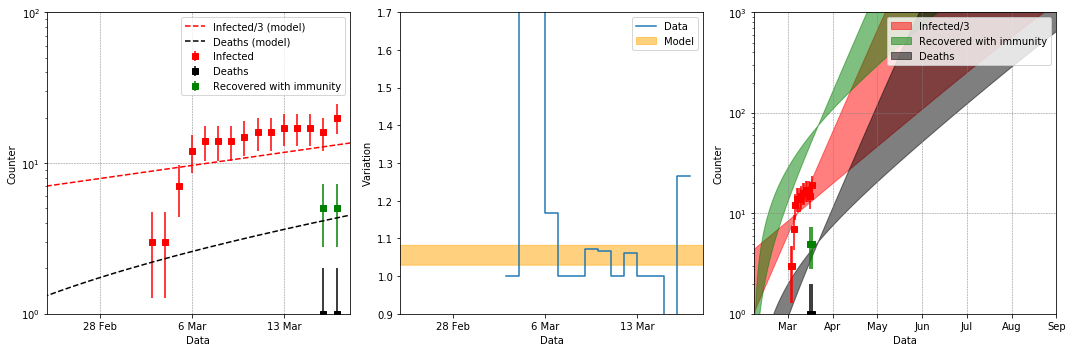

In [172]:
### combined plot

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.errorbar(xdata+17,ydata-ydata_rec,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s',label='Infected')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s',label='Deaths')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s',label='Recovered with immunity')
plt.plot(t, s_vec, 'b--')
plt.plot(t, i_vec/3, 'r--',label='Infected/3 (model)')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--',label='Deaths (model)')
plt.yscale('log')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(17,40)
plt.ylim(1,100)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.subplot(1,3,2)
plt.step(xdata[xdata>=1]+17,incremento,label='Data')
#plt.step(t[1:],incr_SIR,label='Model')
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,43,1/14,5))
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,13,1/14,5))
plt.fill_between(t[1:],incr_SIR_high,incr_SIR_low,color='orange',alpha=0.5,label='Model')
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(17,40)
plt.ylim(0.9,1.7)
plt.legend()
plt.subplot(1,3,3)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
#plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.fill_between(t, i_vec_high/3,i_vec_low/3, label='Infected/3',color='red',alpha=0.5)
plt.fill_between(t, r_vec_high,r_vec_low, color='green',alpha=0.5, label='Recovered with immunity')
plt.fill_between(t, m_vec_high,m_vec_low,color='black',alpha=0.5, label='Deaths')
plt.yscale('log')
plt.xlim(0,180)
plt.ylim(1,10**3)
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('combined_SIR_band_v3_molise.png',dpi=300)
plt.show()

In [142]:
print('Total deaths ',int(m_vec_low[-1]),'-',int(m_vec_high[-1]))
print('Total infected ',int(m_vec_low[-1]+r_vec_low[-1]),'-',int(m_vec_high[-1]+r_vec_high[-1]))
print('Maximum infected (detected) ',int(i_vec_low.max()/3),'-',int(i_vec_high.max()/3))
print('Maximum infected (hospitalized)',int(i_vec_low.max()/3*20/100),'-',int(i_vec_high.max()/3*20/100))
print('Maximum infected (intensive care)',int(i_vec_low.max()/3*10/100),'-',int(i_vec_high.max()/3*10/100))

Total deaths  9965 - 16030
Total infected  153312 - 246620
Maximum infected (detected)  4540 - 17047
Maximum infected (hospitalized) 908 - 3409
Maximum infected (intensive care) 454 - 1704


In [173]:
23000/(6*10**7)*100

0.03833333333333334

In [174]:
15/(300000)*100

0.005